## Import Libraries

In [171]:
#Importing all the relevant libraries needed.
import pandas as pd
import sklearn
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib as mpl
from numpy import array
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.cluster import DBSCAN

## Importing the dataset

In [172]:
# Reading the csv file "x_train_all.csv"
df = pd.read_csv("x_train_all.csv")

In [173]:
# Retrieving the information on the shape of the data.
df.shape

(9690, 2304)

In [174]:
# Intialising all Y train set for all classes in OneVsAll.
Y_train0 = pd.read_csv("./OnevrsAll/0_vrs_all/y_train_0.csv")
Y_train1 = pd.read_csv("./OnevrsAll/1_vrs_all/y_train_1.csv")
Y_train2 = pd.read_csv("./OnevrsAll/2_vrs_all/y_train_2.csv")
Y_train3 = pd.read_csv("./OnevrsAll/3_vrs_all/y_train_3.csv")
Y_train4 = pd.read_csv("./OnevrsAll/4_vrs_all/y_train_4.csv")
Y_train5 = pd.read_csv("./OnevrsAll/5_vrs_all/y_train_5.csv")
Y_train6 = pd.read_csv("./OnevrsAll/6_vrs_all/y_train_6.csv")
Y_train7 = pd.read_csv("./OnevrsAll/7_vrs_all/y_train_7.csv")
Y_train8 = pd.read_csv("./OnevrsAll/8_vrs_all/y_train_8.csv")
Y_train9 = pd.read_csv("./OnevrsAll/9_vrs_all/y_train_9.csv")

In [175]:
# Reading Y trainset of different classes in OneVSAll.
y_train_array = [Y_train0,Y_train1,Y_train2,Y_train3,Y_train4,Y_train5,Y_train6,Y_train7,Y_train8,Y_train9]

In [176]:
# Reading the csv file "y_train_all.csv"
train_y_df = pd.read_csv("y_train_all.csv")

## Data Visualization and Exploration

In [177]:
# Retrieving the information of the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9690 entries, 0 to 9689
Columns: 2304 entries, 0 to 2303
dtypes: float64(2304)
memory usage: 170.3 MB


In [178]:
# Printing the first five rows of the data.
df.head()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,78.0,77.0,76.0,82.0,87.0,92.0,104.0,119.0,117.0,120.0,...,87.0,79.0,72.0,76.0,83.0,95.0,99.0,98.0,95.0,94.0
1,73.0,75.0,79.0,78.0,76.0,75.0,89.0,107.0,133.0,125.0,...,96.0,93.0,85.0,77.0,69.0,73.0,83.0,100.0,101.0,101.0
2,72.0,75.0,79.0,77.0,81.0,89.0,105.0,109.0,86.0,90.0,...,98.0,95.0,88.0,80.0,73.0,71.0,74.0,80.0,89.0,95.0
3,67.0,70.0,74.0,80.0,93.0,107.0,110.0,96.0,69.0,100.0,...,112.0,92.0,87.0,82.0,77.0,72.0,70.0,72.0,81.0,88.0
4,74.0,74.0,73.0,72.0,77.0,87.0,104.0,109.0,84.0,83.0,...,100.0,98.0,99.0,100.0,99.0,89.0,78.0,66.0,68.0,72.0


### Pixel Intensity Histogram

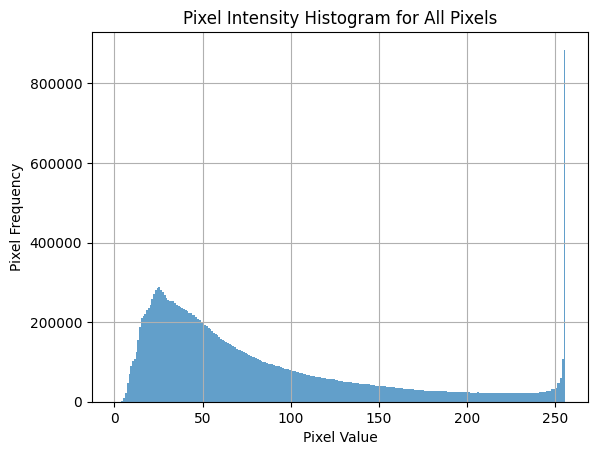

In [179]:
# Flattens the dataframe df into a 1 dimensional array to plot the histogram.
reshaped_df = df.values.ravel()
# Creates the histogram to view the pixel intensity.
plt.hist(reshaped_df, bins=256, range=(0, 256), alpha=0.7)
# Labels the x - axis as Pixel Value.
plt.xlabel('Pixel Value')
# Labels the y - axis as Pixel Frequency.
plt.ylabel('Pixel Frequency')
# Labels the title as Pixel Intensity Histogram for All Pixels.
plt.title('Pixel Intensity Histogram for All Pixels')
# Displays the grid lines on the histogram.
plt.grid(True)
plt.title('Pixel Intensity Histogram for All Pixels')
# Displays the histogram.
plt.show()

### Visualizing the image

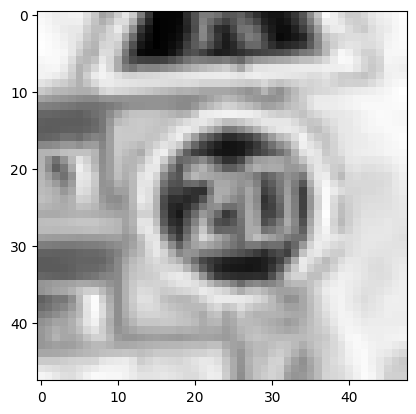

In [180]:
# Storing the images in visualize_img.
visualize_img = df.values

# Viewing the image.
some_digit = visualize_img[1]

# Reshaping the image into 48 x 48 to view it.
some_digit_image = some_digit.reshape(48,48)

# Displaying the image.
plt.imshow(some_digit_image,cmap=mpl.cm.binary)
plt.show()

## Image Enchancement Technique

### Histogram Equalization

In [181]:
# Reshapes the dataframe df into 3D array in the shape 48x48 grid to represent
# in form of image.
reshaped_df = df.values.reshape(-1, 48, 48)

# Initializing the list to store images after applying equalization.
equalized_df = []

# Iterating through all the images to apply histogram equalisation.
for image in reshaped_df:
    # Checking if the image is in the greyscale format and is 8-bit.
    if image.dtype != np.uint8:
        # Converting the image to 8 - bit otherwise.
        image = cv2.convertScaleAbs(image)  # Convert to 8-bit image if needed.

    # Applying histogram equalisation to the image to enchance the contrast.
    equalized_img = cv2.equalizeHist(image)

    # Adding the enchanced image to the equalized_df.
    equalized_df.append(equalized_img)

# Converting the list into NumPy array.
equalized_df = np.array(equalized_df)


In [182]:
# Storing the no. of images and dimensions of equalized_df.
n_img, height, width = equalized_df.shape

# Reshaping the array into two - dimensional array.
equalized_ndf = equalized_df.reshape(n_img, -1)

# Converting the array equalized_ndf into a dataframe.
ndf = pd.DataFrame(equalized_ndf)

### Gamma Correction

In [183]:
# Setting the gamma value for gamma correction.
gamma = 0.62
# Applying gamma correction on the dataframe ndf.
gamma_corrected_ndf = ndf.apply(lambda x: 255 * (x / 255) ** (1 / gamma))

## Data Preprocessing

### Normalizing the dataset

In [184]:
# Normalising the dataframe by dividing it with 255 to bring the pixel values in the range of zero to one.
max_pixel= 255
# Normalizing the dataframe gamma_corrected_ndf.
normalized_df = gamma_corrected_ndf.divide(max_pixel)

In [185]:
# Printing the first five rows of the normalized_df.
normalized_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,0.015170,0.012679,0.009270,0.038780,0.081784,0.135948,0.257663,0.402310,0.384562,0.415820,...,0.081784,0.020645,0.001761,0.009270,0.046400,0.170000,0.199962,0.189770,0.170000,0.154164
1,0.005387,0.009270,0.025159,0.020645,0.012679,0.009270,0.107567,0.269092,0.515050,0.443346,...,0.170000,0.147996,0.069921,0.015170,0.000402,0.005387,0.052450,0.206869,0.217395,0.217395
2,0.007229,0.015170,0.036957,0.026738,0.050402,0.130071,0.257663,0.288555,0.099552,0.138924,...,0.203404,0.176498,0.121442,0.040636,0.010361,0.004546,0.012679,0.040636,0.130071,0.176498
3,0.003759,0.009270,0.020645,0.063147,0.176498,0.288555,0.320758,0.199962,0.007229,0.228119,...,0.337341,0.166786,0.121442,0.079355,0.038780,0.013903,0.009270,0.013903,0.072237,0.130071
4,0.022112,0.022112,0.016479,0.012679,0.044447,0.113040,0.224523,0.269092,0.094340,0.089236,...,0.196542,0.179782,0.186418,0.196542,0.186418,0.124293,0.054529,0.001229,0.003031,0.012679


In [186]:
# Retrieving the information on the shape of the data.
normalized_df.shape

(9690, 2304)

In [187]:
# Converting the normalized data to an array
data_array = normalized_df.values

### Checking for Null Values

In [188]:
# Checking for any null values in the dataframe.
null_values = normalized_df.isnull().sum().sum()
# Printing the number of null values.
print("Total Number of Null Values:", null_values)

Total Number of Null Values: 0


### Outlier Mining

#### DBSCAN

In [189]:
# Setting the value for epsilon parameter for DBSCAN.
eps = 11.0
# Setting the value for minimum sample parameter for DBSCAN.
min_samples = 80
# Intialsing the model for DBSCAN.
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
# Fitting the model to the data_array.
dbscan.fit(data_array)
# Labels all the outliers.
outlier_labels = dbscan.labels_

In [190]:
# Printing the total number of outliers.
num_outliers = np.sum(outlier_labels == -1)
print(f"Number of outliers: {num_outliers}")

Number of outliers: 3680


In [191]:
# Finding all the places where the outliers lie.
outlier_indices = np.where(outlier_labels == -1)[0]
# Coverting it into a list
outlier_indices = outlier_indices.tolist()
# Printing the list of outliers.
print("Outlier List : ",outlier_indices)

Outlier List :  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 56, 57, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 71, 72, 73, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 111, 174, 175, 176, 177, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321,

#### Scatter Plot for Outlier Visualization

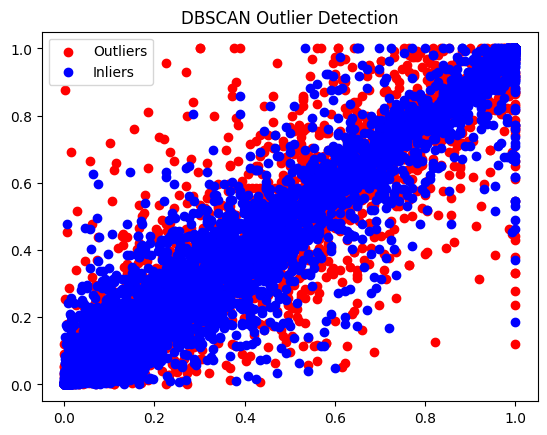

In [192]:
# Creating  a scatter plot to visualize the outliers in the dataset.
plt.scatter(data_array[outlier_labels == -1, 0], data_array[outlier_labels == -1, 1], c='red', label='Outliers')
# Here the red represents the outliers and blue represents inliers.
plt.scatter(data_array[outlier_labels != -1, 0], data_array[outlier_labels != -1, 1], c='blue', label='Inliers')
plt.legend()
# Lablelling the Plot.
plt.title('DBSCAN Outlier Detection')
plt.show()

In [193]:
# Removing all the outliers in the dataframe.
def removeOutliers(dataframe):
    dataframe.drop(dataframe.index[outlier_indices], axis=0, inplace=True)

In [194]:
# Calling the function to  remove the outliers.
removeOutliers(normalized_df)

In [195]:
# Checking the dimension of normalized_df after removing the outliers.
normalized_df.shape

(6010, 2304)

In [196]:
# Removing the outliers in the y_train dataset.
for i in range(len(y_train_array)):
    removeOutliers(y_train_array[i])

In [197]:
# Checking the dimension of one of the y_train files after removing the outliers.
Y_train2.shape

(6010, 1)

In [198]:
# Removing the outliers in train_y_df.
removeOutliers(train_y_df)

In [199]:
# Checking the dimension of  train_y_df files after removing the outliers.
train_y_df.shape

(6010, 1)

## Feature Selection

### Creating datasets with top 5, 10 and 20 features using SelectKBest

In [200]:
# The function returns the top n features for the given dataset.
# Here the n is the number of feature and y is the training dataset.
def top_features(n,y):
    # Intialising the SelectKBest to find the top n features.
    select = SelectKBest(score_func=chi2, k=n)
    # Fitting the SelectKBest to normalized_df
    z = select.fit_transform(normalized_df,y)
    # Here we are filtering all features that are selected as the top features
    filter = select.get_support()
    # Getting the name of the features.
    col_name = normalized_df.columns.values.tolist()
    # Selecting the top features.
    fea = array(col_name)[filter]
    # Returning the top features
    return fea


In [201]:
# This function return all the top n unique features for each class.
def select_features(n):
    # Stores all the features.
    temp_lst = []
    # Iterates through training data set gets the top n features
    for i in range(len(y_train_array)):
        feature_5=top_features(n,y_train_array[i])
        #Iterates through the list and see if the feature is unique.
        for i in feature_5:
            if i not in temp_lst:
                # Adds the feature to the list.
                temp_lst.append(i)
    # Returns the unique features.
    return temp_lst


In [202]:
# Gets the top 5 features for all classes and adds it into a excel.
df_top5 = normalized_df.filter(select_features(5), axis=1)
df_top5.to_excel('Top5.xlsx', index=False)
# Gets the top 10 features for all classes and adds it into a excel.
df_top10 = normalized_df.filter(select_features(10), axis=1)
df_top10.to_excel('Top10.xlsx', index=False)
# Gets the top 20 features for all classes and adds it into a excel.
df_top20 = normalized_df.filter(select_features(20), axis=1)
df_top20.to_excel('Top20.xlsx', index=False)

In [203]:
# Printing the first five rows of the df_top5 to check.
df_top5.head()

,1267,1314,1315,1362,1409,1029,1030,1077,1366,1461,...,1761,794,1166,1167,1215,1263,1744,1666,1667,1695
10,0.424921,0.424921,0.457359,0.253896,0.452670,0.524916,0.544862,0.519974,0.925200,0.443346,...,0.127170,0.925200,0.937513,0.937513,0.943693,0.956098,0.023617,0.084240,0.069921,0.031691
16,0.312586,0.434096,0.166786,0.096933,0.228119,0.805512,0.154164,0.565090,0.882594,0.183088,...,0.220948,0.852631,0.968565,0.956098,0.968565,0.968565,0.030005,0.203404,0.063147,0.019217
17,0.731137,0.788106,0.490696,0.648766,0.725529,0.823062,0.622146,0.852631,0.882594,0.554941,...,0.524916,0.993682,0.943693,0.943693,0.943693,0.943693,0.115815,0.748057,0.420361,0.130071
18,0.193145,0.269092,0.118616,0.017828,0.033412,0.519974,0.138924,0.312586,0.925200,0.590766,...,0.341537,0.876570,0.956098,0.943693,0.956098,0.956098,0.485879,0.333166,0.118616,0.585596
19,0.118616,0.354240,0.118616,0.130071,0.203404,0.675806,0.170000,0.515050,0.931349,0.708806,...,0.452670,0.876570,0.943693,0.937513,0.943693,0.931349,0.495531,0.616874,0.186418,0.549893


In [204]:
# Checking the dimension of df_top5.
df_top5.shape

(6010, 37)

# END OF POOJA & ASMITHA PART

## Start Of Arshati & Prasitha's Part

## VISUALISATION

In [205]:
import pandas as pd

# Loading CSV files
dy = pd.read_csv('y_train_all.csv')  
dx = pd.read_csv('x_train_all.csv') 

class_ranges = {}
current_class = dy.iloc[0, 0]  # Get first class label
start_row = 0

# Iterate through the y_train_all dataset to find row ranges for each class
for i in range(1, len(dy)):
    if dy.iloc[i, 0] != current_class:
        end_row = i - 1
        class_ranges[current_class] = (start_row, end_row)
        current_class = dy.iloc[i, 0]
        start_row = i

# Adding the last class range
end_row = len(dy) - 1
class_ranges[current_class] = (start_row, end_row)

# Printing the row ranges for each class in y_train_all dataset
print("Row ranges for each class label in y_train:")
for class_label, (start, end) in class_ranges.items():
    print(f"Class {class_label}: Rows {start} to {end}")

# applying same row ranges to x_train_all
class_ranges_x_train = {}

for class_label, (start, end) in class_ranges.items():
    x_train_subset = dx.iloc[start:end+1]
    class_ranges_x_train[class_label] = x_train_subset

# Printing the row ranges for each class label in x_train
print("\nRow ranges for each class label in x_train:")
for class_label, x_train_subset in class_ranges_x_train.items():
    print(f"Class {class_label}: Rows {x_train_subset.index[0]} to {x_train_subset.index[-1]}")

Row ranges for each class label in y_train:
Class 0: Rows 0 to 209
Class 1: Rows 210 to 2429
Class 2: Rows 2430 to 4679
Class 3: Rows 4680 to 6089
Class 4: Rows 6090 to 8069
Class 5: Rows 8070 to 8279
Class 6: Rows 8280 to 8639
Class 7: Rows 8640 to 8879
Class 8: Rows 8880 to 9419
Class 9: Rows 9420 to 9689

Row ranges for each class label in x_train:
Class 0: Rows 0 to 209
Class 1: Rows 210 to 2429
Class 2: Rows 2430 to 4679
Class 3: Rows 4680 to 6089
Class 4: Rows 6090 to 8069
Class 5: Rows 8070 to 8279
Class 6: Rows 8280 to 8639
Class 7: Rows 8640 to 8879
Class 8: Rows 8880 to 9419
Class 9: Rows 9420 to 9689


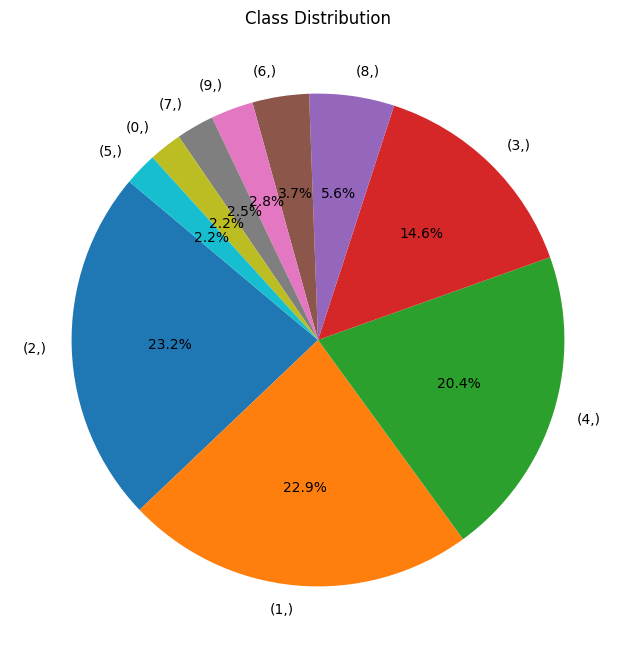

In [206]:
import matplotlib.pyplot as plt
import pandas as pd

# Loading the data
data = pd.read_csv('y_train_all.csv')

# Counting the occurrences of each class
class_counts = data.value_counts()

# Geting the class labels and their counts
labels = class_counts.index
counts = class_counts.values

# Creating a pie chart
plt.figure(figsize=(8, 8))

plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Class Distribution')

# Display the chart
plt.show()

## End Of Arshati & Prasitha's Part

# START OF GAURI'S PART

# Naïve Bayes Classifier

There are 3 types of Naïve Bayes models being implemented in the proceeding code. The 3 types are listed below:-

Gaussian Naïve Bayes

Multinomial Naïve Bayes

Bernoulli Naïve Bayes

In [207]:
#Reading Test files
test_X_df = pd.read_csv("x_test_all.csv")
test_y_df = pd.read_csv("y_test_all.csv")

In [208]:
# test_X_df.shape
# test_y_df.shape
train_y_df.shape

(6010, 1)

In [209]:
#reading file with top 5, 10 and 20 features for each class
df_5 = pd.read_excel("Top5.xlsx")
df_10 = pd.read_excel("Top10.xlsx")
df_20 = pd.read_excel("Top20.xlsx")

In [210]:
df_5.shape

(6010, 37)

In [211]:
df_10.shape

(6010, 70)

In [212]:
df_20.shape

(6010, 134)

In [213]:
#Importing Libraries and modules

#importing library for implementing Naive Bayes models
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB

#importing library for generating metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

#importing library for cross validation
from sklearn.model_selection import cross_val_score

#importing library for confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

#ignoring warnings
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)


## K-Fold Cross Validation

In [214]:
#K-fold cross validation

#gnb = gaussian NB model
# X_train = training dataset
# y_train = target column of training dataset
#k = number of folds

def cross_validation(model, X_train, y_train, k):
  model.fit(X_train, y_train)

  # Applying 10-Fold Cross Validation
  scores = cross_val_score(model, X_train, y_train, cv = k, scoring='accuracy')
  print('Average cross-validation score: {:.4f}'.format(scores.mean()))

## Gaussian NB

GaussianNB implements the Gaussian Naive Bayes algorithm for classification.

### Cross validating Gaussian Model

In [215]:
# instantiate the model
gnb_5 = GaussianNB()
gnb_10 = GaussianNB()
gnb_20 = GaussianNB()
gnb_all = GaussianNB()

print("top 5 features:")
cross_validation(gnb_5,df_5, train_y_df,10)
print("top 10 features:")
cross_validation(gnb_10,df_10, train_y_df,10)
print("top 20 features:")
cross_validation(gnb_20,df_20, train_y_df,10)
print("Complete train dataset:")
cross_validation(gnb_all,normalized_df, train_y_df,10)


top 5 features:
Average cross-validation score: 0.5248
top 10 features:
Average cross-validation score: 0.5028
top 20 features:
Average cross-validation score: 0.5078
Complete train dataset:
Average cross-validation score: 0.3641


In [216]:
test_X_df.shape

(3090, 2304)

In [217]:
df_5.shape

(6010, 37)

### Training Model

In [218]:
# instantiate the model
gnb = GaussianNB()

### Analysis for Guassian - Confusion Matrix, FP, TP, FN, TN, SPECIFICITY, SENSITIVITY, ROC CURVE (Arshati & Prasitha)

In [219]:
def training_with_diff_datasets_GNB (X_train, y_train, X_test = test_X_df, y_test = test_y_df):
    X1_train, X1_test, y1_train, y1_test = X_train, X_test, y_train, y_test

    #Selecting same features in test dataset as train dataset

    #columns in train dataset
    cols_to_keep = X1_train.columns.tolist()
#     print(len(cols_to_keep))

    string_cols_to_keep = [str(x) for x in cols_to_keep]

    #columns in test dataset
    total_columns_in_test = X1_test.columns.tolist()
#     print(len(total_columns_in_test))

    #removing columns that do not belong to cols_to_keep
    cols_to_remove = list(set(total_columns_in_test) - set(string_cols_to_keep))
#     print(len(cols_to_remove))

    #dropping columns to remove from test dataset
    X_test_selected = X1_test.drop(cols_to_remove, axis=1)
    X_test_selected1 = X_test_selected[string_cols_to_keep]
    # selected = X_test_selected.columns.tolist()

    #   X_test_selected = X1_test.drop(columns=[col for col in X1_test.columns if col not in cols_to_keep])
    #   print(len(X_test_selected.columns.tolist()))

    #   # print(len(selected))
    #   # selected.sort()
    #   # cols_to_keep.sort()
    #   # print(selected)
    #   # print(cols_to_keep)
    #   # print(selected == cols_to_keep)

    gnb.fit(X1_train.values, y1_train.values)
    y_pred = gnb.predict(X_test_selected1.values)

    # Print the Confusion Matrix and slice it into four pieces

    cm = confusion_matrix(y_test, y_pred)

    FP = cm.sum(axis=0) - np.diag(cm)
    FN = cm.sum(axis=1) - np.diag(cm)
    TP = np.diag(cm)
    TN = cm.sum() - (FP + FN + TP)

    vis = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = gnb.classes_)
    vis.plot()
    plt.show()

    print(f"TP (True Positive): {TP}")
    print(f"TN (True Negative): {TN}")
    print(f"FN (False Negative): {FP}")
    print(f"FP (False Positive): {FN}")

    #check if model is overfitting or underfitting
    print('Training set score: {:.4f}'.format(gnb.score(X1_train.values, y1_train.values)))
    print('Test set score: {:.4f}'.format(gnb.score(X_test_selected1.values, y1_test.values)))
    print()

    #checking Accuracy, Precision, Recall Score and Mean Absolute Error
    print('Model Accuracy Score : {:.4f}'.format(accuracy_score(y1_test,y_pred)))
    print("Precision Score : {:.4f}".format(precision_score(y1_test, y_pred, average='micro')))
    print("Recall Score : {:.4f}".format(recall_score(y1_test, y_pred, average='micro')))
    print("Mean Absolute Error : {:.4f}".format(mean_absolute_error(y1_test,y_pred)))
    print()
    print()

    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)

    # Specificity or true negative rate
    TNR = TN/(TN+FP)

    # Fall out or false positive rate
    FPR = FP/(FP+TN)

    # False negative rate
    FNR = FN/(TP+FN)

    print(f"Sensitivity (true positive rate), for each class: {TPR}")
    print(f"Specificity (true negative rate), for each class: {TNR}")
    print()

    print(f"FP rate: {FPR}")
    print(f"FN rate: {FNR}")
    print()

    #plotting roc curve

    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve for Gaussian Naive Bayes Classifier')
    plt.legend(loc='lower right')
    plt.show()

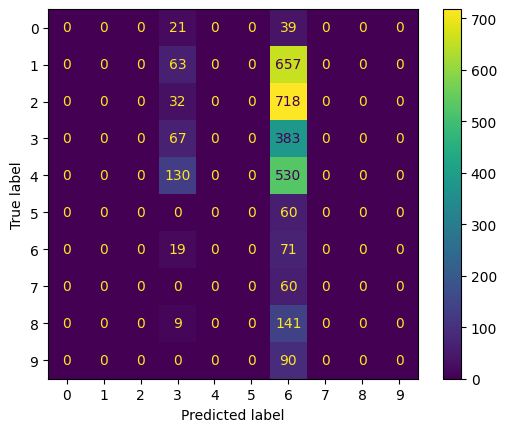

TP (True Positive): [ 0  0  0 67  0  0 71  0  0  0]
TN (True Negative): [3030 2370 2340 2366 2430 3030  322 3030 2940 3000]
FN (False Negative): [   0    0    0  274    0    0 2678    0    0    0]
FP (False Positive): [ 60 720 750 383 660  60  19  60 150  90]
Training set score: 0.5614
Test set score: 0.0447

Model Accuracy Score : 0.0447
Precision Score : 0.0447
Recall Score : 0.0447
Mean Absolute Error : 3.1472


Sensitivity (true positive rate), for each class: [0.         0.         0.         0.14888889 0.         0.
 0.78888889 0.         0.         0.        ]
Specificity (true negative rate), for each class: [1.         1.         1.         0.89621212 1.         1.
 0.10733333 1.         1.         1.        ]

FP rate: [0.         0.         0.         0.10378788 0.         0.
 0.89266667 0.         0.         0.        ]
FN rate: [1.         1.         1.         0.85111111 1.         1.
 0.21111111 1.         1.         1.        ]



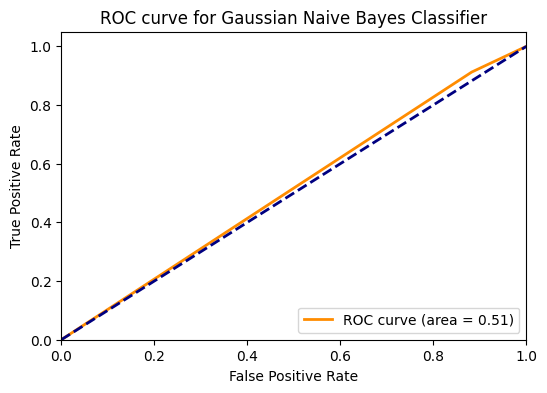

In [220]:
#training model with top 5 feature dataset
training_with_diff_datasets_GNB(df_5, train_y_df)

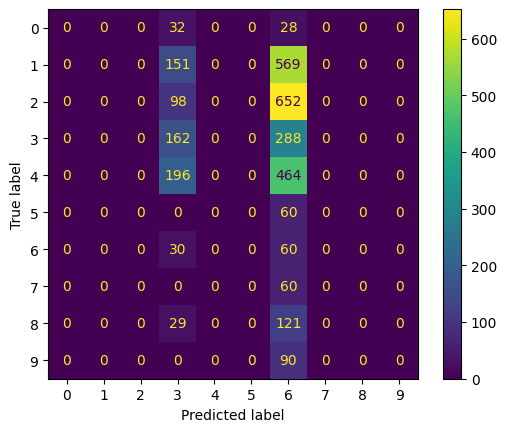

TP (True Positive): [  0   0   0 162   0   0  60   0   0   0]
TN (True Negative): [3030 2370 2340 2104 2430 3030  668 3030 2940 3000]
FN (False Negative): [   0    0    0  536    0    0 2332    0    0    0]
FP (False Positive): [ 60 720 750 288 660  60  30  60 150  90]
Training set score: 0.5448
Test set score: 0.0718

Model Accuracy Score : 0.0718
Precision Score : 0.0718
Recall Score : 0.0718
Mean Absolute Error : 2.9036


Sensitivity (true positive rate), for each class: [0.         0.         0.         0.36       0.         0.
 0.66666667 0.         0.         0.        ]
Specificity (true negative rate), for each class: [1.         1.         1.         0.7969697  1.         1.
 0.22266667 1.         1.         1.        ]

FP rate: [0.         0.         0.         0.2030303  0.         0.
 0.77733333 0.         0.         0.        ]
FN rate: [1.         1.         1.         0.64       1.         1.
 0.33333333 1.         1.         1.        ]



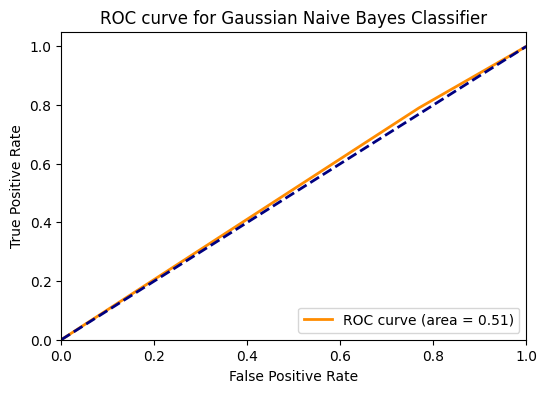

In [221]:
#training model with top 10 feature dataset
training_with_diff_datasets_GNB(df_10, train_y_df)

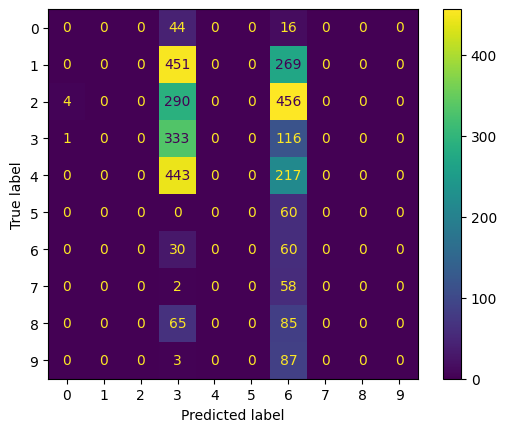

TP (True Positive): [  0   0   0 333   0   0  60   0   0   0]
TN (True Negative): [3025 2370 2340 1312 2430 3030 1636 3030 2940 3000]
FN (False Negative): [   5    0    0 1328    0    0 1364    0    0    0]
FP (False Positive): [ 60 720 750 117 660  60  30  60 150  90]
Training set score: 0.5461
Test set score: 0.1272

Model Accuracy Score : 0.1272
Precision Score : 0.1272
Recall Score : 0.1272
Mean Absolute Error : 2.2055


Sensitivity (true positive rate), for each class: [0.         0.         0.         0.74       0.         0.
 0.66666667 0.         0.         0.        ]
Specificity (true negative rate), for each class: [0.99834983 1.         1.         0.4969697  1.         1.
 0.54533333 1.         1.         1.        ]

FP rate: [0.00165017 0.         0.         0.5030303  0.         0.
 0.45466667 0.         0.         0.        ]
FN rate: [1.         1.         1.         0.26       1.         1.
 0.33333333 1.         1.         1.        ]



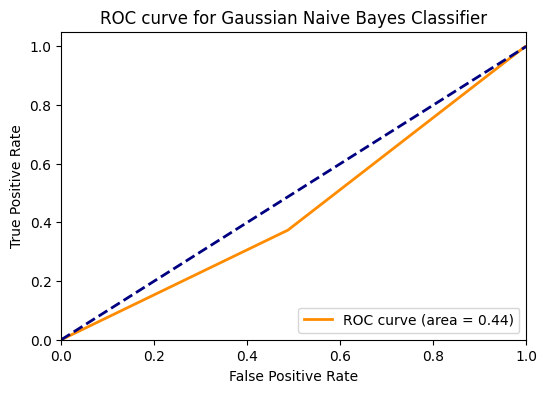

In [222]:
#training model with top 20 feature dataset
training_with_diff_datasets_GNB(df_20, train_y_df)

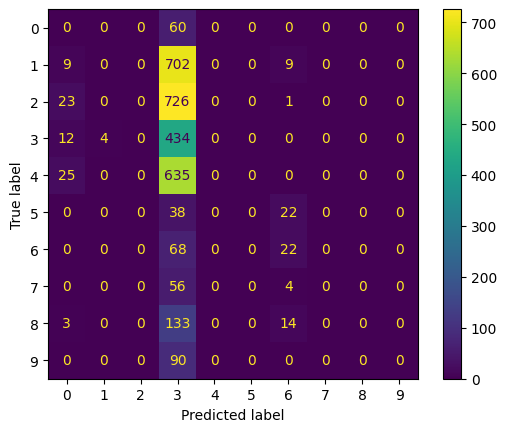

TP (True Positive): [  0   0   0 434   0   0  22   0   0   0]
TN (True Negative): [2958 2366 2340  132 2430 3030 2950 3030 2940 3000]
FN (False Negative): [  72    4    0 2508    0    0   50    0    0    0]
FP (False Positive): [ 60 720 750  16 660  60  68  60 150  90]
Training set score: 0.4359
Test set score: 0.1476

Model Accuracy Score : 0.1476
Precision Score : 0.1476
Recall Score : 0.1476
Mean Absolute Error : 1.6117


Sensitivity (true positive rate), for each class: [0.         0.         0.         0.96444444 0.         0.
 0.24444444 0.         0.         0.        ]
Specificity (true negative rate), for each class: [0.97623762 0.99831224 1.         0.05       1.         1.
 0.98333333 1.         1.         1.        ]

FP rate: [0.02376238 0.00168776 0.         0.95       0.         0.
 0.01666667 0.         0.         0.        ]
FN rate: [1.         1.         1.         0.03555556 1.         1.
 0.75555556 1.         1.         1.        ]



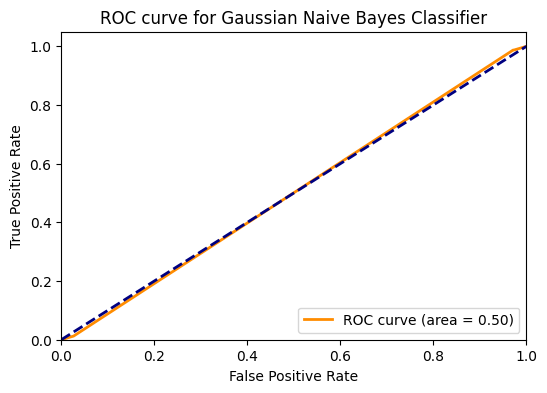

In [223]:
#training model with complete train dataset
training_with_diff_datasets_GNB(normalized_df, train_y_df)

## Multinominal NB

MultinominalNB implements the Multinominal Naive Bayes algorithm for classification.

### Cross Validating Multinominal Model

In [224]:
# instantiate the model
mnb_5 = MultinomialNB()
mnb_10 = MultinomialNB()
mnb_20 = MultinomialNB()
mnb_all = MultinomialNB()

print("top 5 features:")
cross_validation(mnb_5,df_5, train_y_df,10)
print("top 10 features:")
cross_validation(mnb_10,df_10, train_y_df,10)
print("top 20 features:")
cross_validation(mnb_20,df_20, train_y_df,10)
print("Complete train dataset:")
cross_validation(mnb_all,normalized_df, train_y_df,10)

top 5 features:
Average cross-validation score: 0.5864
top 10 features:
Average cross-validation score: 0.5809
top 20 features:
Average cross-validation score: 0.5702
Complete train dataset:
Average cross-validation score: 0.3170


### Training Model

In [225]:
mnb = MultinomialNB()

### Analysis For Multinomial - Confusion Matrix, FP, TP, FN, TN, SPECIFICITY, SENSITIVITY, ROC CURVE (Arshati & Prasitha)

In [226]:
def training_with_diff_datasets_MNB (X_train, y_train, X_test = test_X_df, y_test = test_y_df):
    X1_train, X1_test, y1_train, y1_test = X_train, X_test, y_train, y_test

    # Select the same features on the test set

    #columns in train dataset
    cols_to_keep = X1_train.columns.tolist()
#     print(len(cols_to_keep))

    string_cols_to_keep = [str(x) for x in cols_to_keep]
    #columns in test dataset
    total_columns_in_test = X1_test.columns.tolist()
#     print(len(total_columns_in_test))

    #removing columns that do not belong to cols_to_keep
    cols_to_remove = list(set(total_columns_in_test) - set(string_cols_to_keep))
#     print(len(cols_to_remove))

    #dropping columns to remove from test dataset
    X_test_selected = X1_test.drop(cols_to_remove, axis=1)
    X_test_selected1 = X_test_selected[string_cols_to_keep]
    # selected = X_test_selected.columns.tolist()

    #   X_test_selected = X1_test.drop(columns=[col for col in X1_test.columns if col not in cols_to_keep])
    #   print(len(X_test_selected.columns.tolist()))

    #   # print(len(selected))
    #   # selected.sort()
    #   # cols_to_keep.sort()
    #   # print(selected)
    #   # print(cols_to_keep)
    #   # print(selected == cols_to_keep)

    mnb.fit(X1_train.values, y1_train.values)
    y_pred = mnb.predict(X_test_selected1.values)

    # Print the Confusion Matrix and slice it into four pieces

    cm = confusion_matrix(y_test, y_pred)

    FP = cm.sum(axis=0) - np.diag(cm)
    FN = cm.sum(axis=1) - np.diag(cm)
    TP = np.diag(cm)
    TN = cm.sum() - (FP + FN + TP)

    vis = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = gnb.classes_)
    vis.plot()
    plt.show()

    print(f"TP (True Positive): {TP}")
    print(f"TN (True Negative): {TN}")
    print(f"FN (False Negative): {FP}")
    print(f"FP (False Positive): {FN}")

    #check if model is overfitting or underfitting
    print('Training set score: {:.4f}'.format(mnb.score(X1_train.values, y1_train.values)))
    print('Test set score: {:.4f}'.format(mnb.score(X_test_selected1.values, y1_test.values)))
    print()

    #checking Accuracy, Precision, Recall Score and Mean Absolute Error
    print('Model Accuracy Score : {:.4f}'.format(accuracy_score(y1_test,y_pred)))
    print("Precision Score : {:.4f}".format(precision_score(y1_test, y_pred, average='micro')))
    print("Recall Score : {:.4f}".format(recall_score(y1_test, y_pred, average='micro')))
    print("Mean Absolute Error : {:.4f}".format(mean_absolute_error(y1_test,y_pred)))
    print()
    print()

    #   # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)

    # Specificity or true negative rate
    TNR = TN/(TN+FP)

    # Fall out or false positive rate
    FPR = FP/(FP+TN)

    # False negative rate
    FNR = FN/(TP+FN)

    print(f"Sensitivity (true positive rate), for each class: {TPR}")
    print(f"Specificity (true negative rate), for each class: {TNR}")
    print()

    print(f"FP rate: {FPR}")
    print(f"FN rate: {FNR}")
    print()

      #plotting roc curve

    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve for Multinomial Naive Bayes Classifier')
    plt.legend(loc='lower right')
    plt.show()

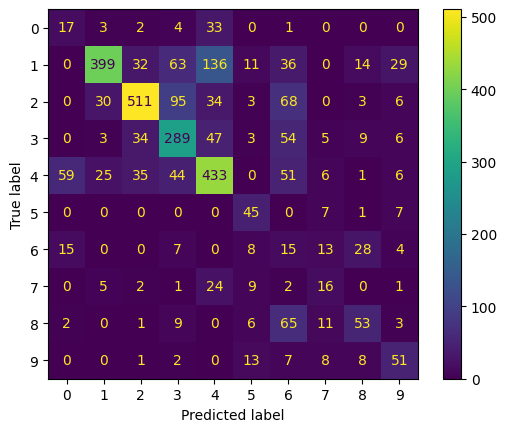

TP (True Positive): [ 17 399 511 289 433  45  15  16  53  51]
TN (True Negative): [2954 2304 2233 2415 2156 2977 2716 2980 2876 2938]
FN (False Negative): [ 76  66 107 225 274  53 284  50  64  62]
FP (False Positive): [ 43 321 239 161 227  15  75  44  97  39]
Training set score: 0.6080
Test set score: 0.5919

Model Accuracy Score : 0.5919
Precision Score : 0.5919
Recall Score : 0.5919
Mean Absolute Error : 1.1243


Sensitivity (true positive rate), for each class: [0.28333333 0.55416667 0.68133333 0.64222222 0.65606061 0.75
 0.16666667 0.26666667 0.35333333 0.56666667]
Specificity (true negative rate), for each class: [0.97491749 0.9721519  0.9542735  0.91477273 0.8872428  0.98250825
 0.90533333 0.98349835 0.97823129 0.97933333]

FP rate: [0.02508251 0.0278481  0.0457265  0.08522727 0.1127572  0.01749175
 0.09466667 0.01650165 0.02176871 0.02066667]
FN rate: [0.71666667 0.44583333 0.31866667 0.35777778 0.34393939 0.25
 0.83333333 0.73333333 0.64666667 0.43333333]



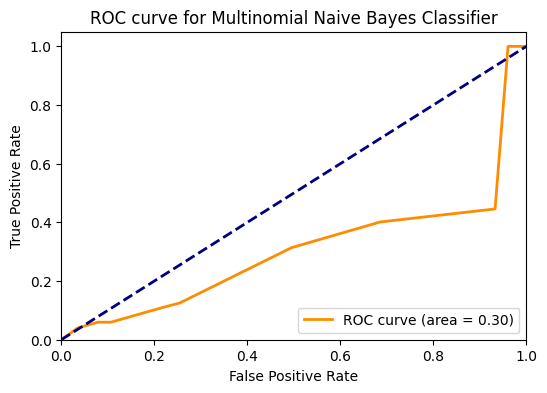

In [227]:
#training model with top 5 feature dataset
training_with_diff_datasets_MNB(df_5, train_y_df)

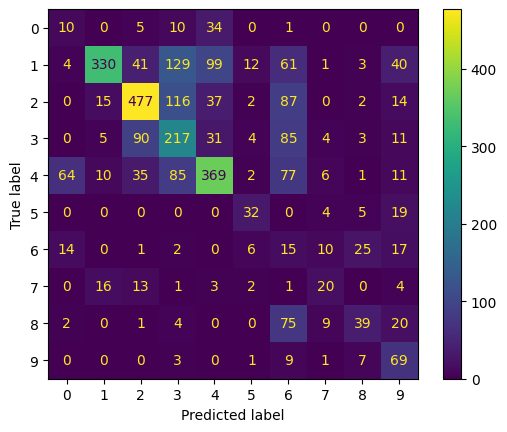

TP (True Positive): [ 10 330 477 217 369  32  15  20  39  69]
TN (True Negative): [2946 2324 2154 2290 2226 3001 2604 2995 2894 2864]
FN (False Negative): [ 84  46 186 350 204  29 396  35  46 136]
FP (False Positive): [ 50 390 273 233 291  28  75  40 111  21]
Training set score: 0.6057
Test set score: 0.5107

Model Accuracy Score : 0.5107
Precision Score : 0.5107
Recall Score : 0.5107
Mean Absolute Error : 1.3243


Sensitivity (true positive rate), for each class: [0.16666667 0.45833333 0.636      0.48222222 0.55909091 0.53333333
 0.16666667 0.33333333 0.26       0.76666667]
Specificity (true negative rate), for each class: [0.97227723 0.98059072 0.92051282 0.86742424 0.91604938 0.99042904
 0.868      0.98844884 0.98435374 0.95466667]

FP rate: [0.02772277 0.01940928 0.07948718 0.13257576 0.08395062 0.00957096
 0.132      0.01155116 0.01564626 0.04533333]
FN rate: [0.83333333 0.54166667 0.364      0.51777778 0.44090909 0.46666667
 0.83333333 0.66666667 0.74       0.23333333]



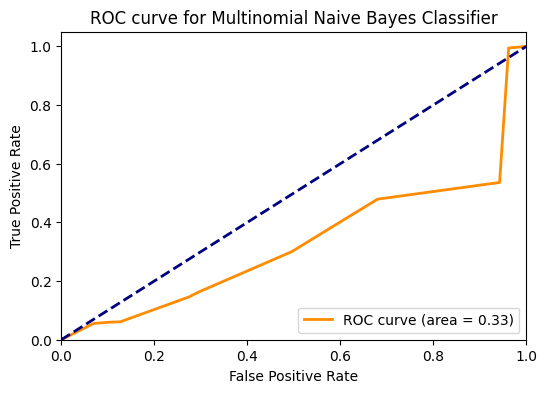

In [228]:
#training model with top 10 feature dataset
training_with_diff_datasets_MNB(df_10, train_y_df)

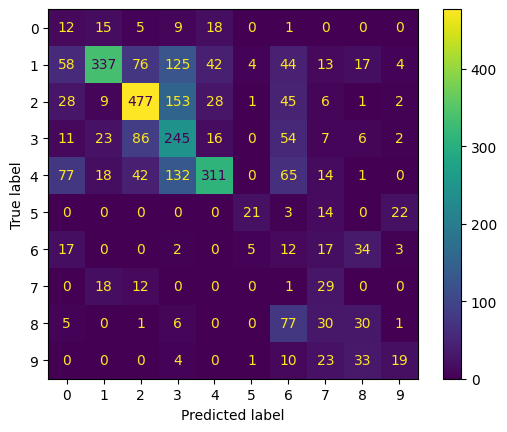

TP (True Positive): [ 12 337 477 245 311  21  12  29  30  19]
TN (True Negative): [2834 2287 2118 2209 2326 3019 2700 2906 2848 2966]
FN (False Negative): [196  83 222 431 104  11 300 124  92  34]
FP (False Positive): [ 48 383 273 205 349  39  78  31 120  71]
Training set score: 0.5947
Test set score: 0.4832

Model Accuracy Score : 0.4832
Precision Score : 0.4832
Recall Score : 0.4832
Mean Absolute Error : 1.1883


Sensitivity (true positive rate), for each class: [0.2        0.46805556 0.636      0.54444444 0.47121212 0.35
 0.13333333 0.48333333 0.2        0.21111111]
Specificity (true negative rate), for each class: [0.93531353 0.9649789  0.90512821 0.83674242 0.95720165 0.99636964
 0.9        0.95907591 0.96870748 0.98866667]

FP rate: [0.06468647 0.0350211  0.09487179 0.16325758 0.04279835 0.00363036
 0.1        0.04092409 0.03129252 0.01133333]
FN rate: [0.8        0.53194444 0.364      0.45555556 0.52878788 0.65
 0.86666667 0.51666667 0.8        0.78888889]



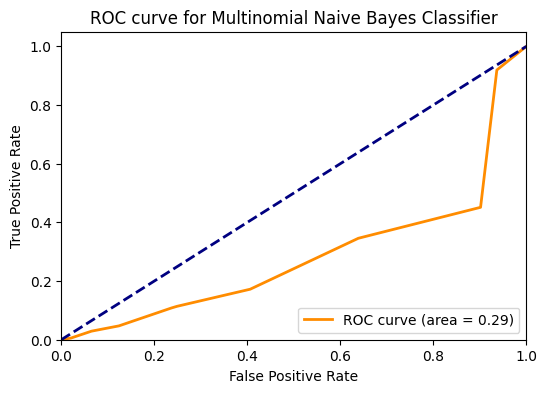

In [229]:
#training model with top 20 feature dataset
training_with_diff_datasets_MNB(df_20, train_y_df)

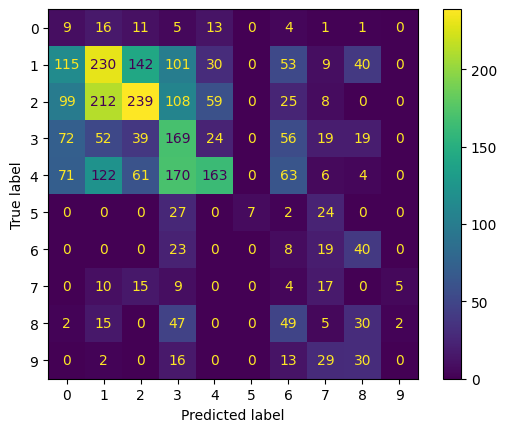

TP (True Positive): [  9 230 239 169 163   7   8  17  30   0]
TN (True Negative): [2671 1941 2072 2134 2304 3030 2731 2910 2806 2993]
FN (False Negative): [359 429 268 506 126   0 269 120 134   7]
FP (False Positive): [ 51 490 511 281 497  53  82  43 120  90]
Training set score: 0.3686
Test set score: 0.2822

Model Accuracy Score : 0.2822
Precision Score : 0.2822
Recall Score : 0.2822
Mean Absolute Error : 1.6340


Sensitivity (true positive rate), for each class: [0.15       0.31944444 0.31866667 0.37555556 0.2469697  0.11666667
 0.08888889 0.28333333 0.2        0.        ]
Specificity (true negative rate), for each class: [0.88151815 0.81898734 0.88547009 0.80833333 0.94814815 1.
 0.91033333 0.96039604 0.95442177 0.99766667]

FP rate: [0.11848185 0.18101266 0.11452991 0.19166667 0.05185185 0.
 0.08966667 0.03960396 0.04557823 0.00233333]
FN rate: [0.85       0.68055556 0.68133333 0.62444444 0.7530303  0.88333333
 0.91111111 0.71666667 0.8        1.        ]



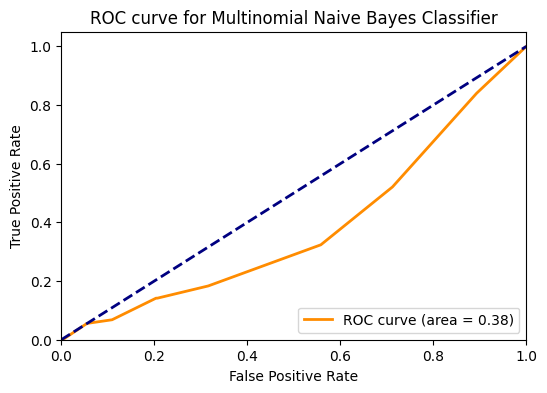

In [230]:
#training model with complete train dataset
training_with_diff_datasets_MNB(normalized_df, train_y_df)

## ComplementNB

ComplementNB implements the Complement Naive Bayes algorithm for classification.

### Performing Cross Validation on ComplementNB

In [231]:
# instantiate the model
cnb_5 = ComplementNB()
cnb_10 = ComplementNB()
cnb_20 = ComplementNB()
cnb_all = ComplementNB()

print("top 5 features:")
cross_validation(cnb_5,df_5, train_y_df,10)
print("top 10 features:")
cross_validation(cnb_10,df_10, train_y_df,10)
print("top 20 features:")
cross_validation(cnb_20,df_20, train_y_df,10)
print("Complete train dataset:")
cross_validation(cnb_all,normalized_df, train_y_df,10)


top 5 features:
Average cross-validation score: 0.5908
top 10 features:
Average cross-validation score: 0.5512
top 20 features:
Average cross-validation score: 0.5208
Complete train dataset:
Average cross-validation score: 0.3562


### Training Model

In [232]:
cnb = ComplementNB()

### Analysis for Complement - Confusion Matrix, FP, TP, FN, TN, SPECIFICITY, SENSITIVITY, ROC CURVE (Arshati & Prasitha)

In [233]:
def training_with_diff_datasets_CNB (X_train, y_train, X_test = test_X_df, y_test = test_y_df):
    X1_train, X1_test, y1_train, y1_test = X_train, X_test, y_train, y_test

    # Select the same features on the test set

    #columns in train dataset
    cols_to_keep = X1_train.columns.tolist()
#     print(len(cols_to_keep))

    string_cols_to_keep = [str(x) for x in cols_to_keep]
    #columns in test dataset
    total_columns_in_test = X1_test.columns.tolist()
#     print(len(total_columns_in_test))

    #removing columns that do not belong to cols_to_keep
    cols_to_remove = list(set(total_columns_in_test) - set(string_cols_to_keep))
#     print(len(cols_to_remove))

    #dropping columns to remove from test dataset
    X_test_selected = X1_test.drop(cols_to_remove, axis=1)
    X_test_selected1 = X_test_selected[string_cols_to_keep]
    # selected = X_test_selected.columns.tolist()

    #   X_test_selected = X1_test.drop(columns=[col for col in X1_test.columns if col not in cols_to_keep])
    #   print(len(X_test_selected.columns.tolist()))

    #   # print(len(selected))
    #   # selected.sort()
    #   # cols_to_keep.sort()
    #   # print(selected)
    #   # print(cols_to_keep)
    #   # print(selected == cols_to_keep)

    cnb.fit(X1_train.values, y1_train.values)
    y_pred = cnb.predict(X_test_selected1.values)

    # Print the Confusion Matrix and slice it into four pieces

    cm = confusion_matrix(y_test, y_pred)

    FP = cm.sum(axis=0) - np.diag(cm)
    FN = cm.sum(axis=1) - np.diag(cm)
    TP = np.diag(cm)
    TN = cm.sum() - (FP + FN + TP)

    vis = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = gnb.classes_)
    vis.plot()
    plt.show()

    print(f"TP (True Positive): {TP}")
    print(f"TN (True Negative): {TN}")
    print(f"FN (False Negative): {FP}")
    print(f"FP (False Positive): {FN}")

    #check if model is overfitting or underfitting
    print('Training set score: {:.4f}'.format(cnb.score(X1_train.values, y1_train.values)))
    print('Test set score: {:.4f}'.format(cnb.score(X_test_selected1.values, y1_test.values)))
    print()

    #checking Accuracy, Precision, Recall Score and Mean Absolute Error
    print('Model Accuracy Score : {:.4f}'.format(accuracy_score(y1_test,y_pred)))
    print("Precision Score : {:.4f}".format(precision_score(y1_test, y_pred, average='micro')))
    print("Recall Score : {:.4f}".format(recall_score(y1_test, y_pred, average='micro')))
    print("Mean Absolute Error : {:.4f}".format(mean_absolute_error(y1_test,y_pred)))
    print()
    print()

    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)

    # Specificity or true negative rate
    TNR = TN/(TN+FP)

    # Fall out or false positive rate
    FPR = FP/(FP+TN)

    # False negative rate
    FNR = FN/(TP+FN)

    print(f"Sensitivity (true positive rate), for each class: {TPR}")
    print(f"Specificity (true negative rate), for each class: {TNR}")
    print()

    print(f"FP rate: {FPR}")
    print(f"FN rate: {FNR}")
    print()

    #plotting roc curve

    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve for Complement Naive Bayes Classifier')
    plt.legend(loc='lower right')
    plt.show()

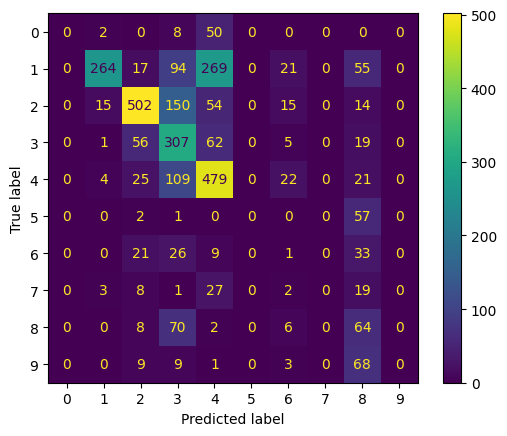

TP (True Positive): [  0 264 502 307 479   0   1   0  64   0]
TN (True Negative): [3030 2345 2194 2172 1956 3030 2926 3030 2654 3000]
FN (False Negative): [  0  25 146 468 474   0  74   0 286   0]
FP (False Positive): [ 60 456 248 143 181  60  89  60  86  90]
Training set score: 0.6052
Test set score: 0.5233

Model Accuracy Score : 0.5233
Precision Score : 0.5233
Recall Score : 0.5233
Mean Absolute Error : 1.2557


Sensitivity (true positive rate), for each class: [0.         0.36666667 0.66933333 0.68222222 0.72575758 0.
 0.01111111 0.         0.42666667 0.        ]
Specificity (true negative rate), for each class: [1.         0.98945148 0.93760684 0.82272727 0.80493827 1.
 0.97533333 1.         0.90272109 1.        ]

FP rate: [0.         0.01054852 0.06239316 0.17727273 0.19506173 0.
 0.02466667 0.         0.09727891 0.        ]
FN rate: [1.         0.63333333 0.33066667 0.31777778 0.27424242 1.
 0.98888889 1.         0.57333333 1.        ]



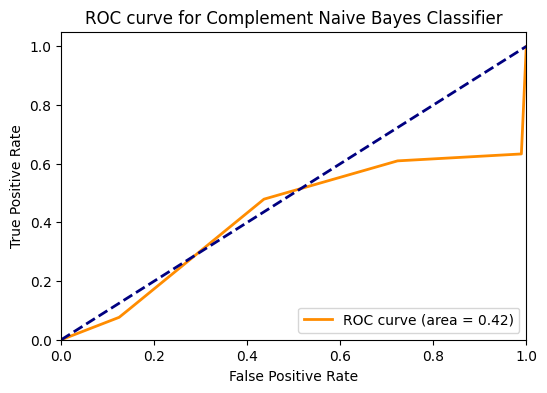

In [234]:
#training model with top 5 feature dataset
training_with_diff_datasets_CNB(df_5, train_y_df)

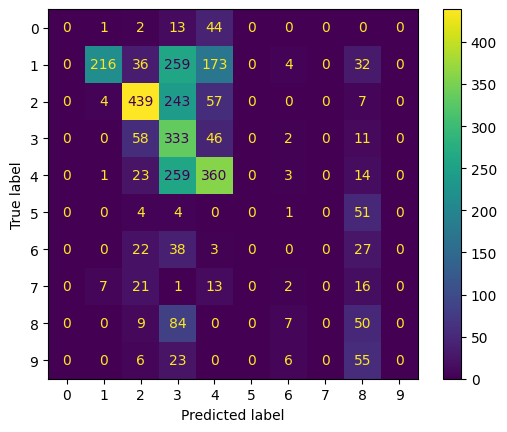

TP (True Positive): [  0 216 439 333 360   0   0   0  50   0]
TN (True Negative): [3030 2357 2159 1716 2094 3030 2975 3030 2727 3000]
FN (False Negative): [  0  13 181 924 336   0  25   0 213   0]
FP (False Positive): [ 60 504 311 117 300  60  90  60 100  90]
Training set score: 0.5712
Test set score: 0.4524

Model Accuracy Score : 0.4524
Precision Score : 0.4524
Recall Score : 0.4524
Mean Absolute Error : 1.2492


Sensitivity (true positive rate), for each class: [0.         0.3        0.58533333 0.74       0.54545455 0.
 0.         0.         0.33333333 0.        ]
Specificity (true negative rate), for each class: [1.         0.99451477 0.92264957 0.65       0.8617284  1.
 0.99166667 1.         0.92755102 1.        ]

FP rate: [0.         0.00548523 0.07735043 0.35       0.1382716  0.
 0.00833333 0.         0.07244898 0.        ]
FN rate: [1.         0.7        0.41466667 0.26       0.45454545 1.
 1.         1.         0.66666667 1.        ]



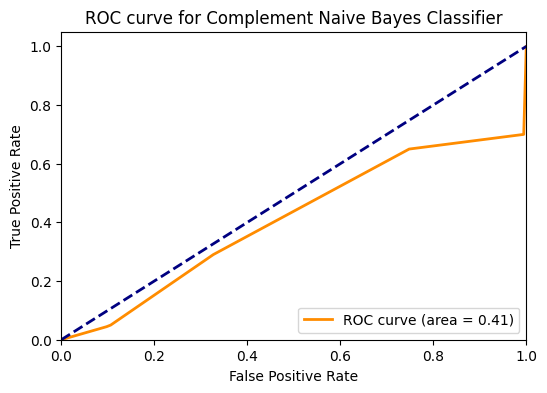

In [235]:
#training model with top 10 feature dataset
training_with_diff_datasets_CNB(df_10, train_y_df)

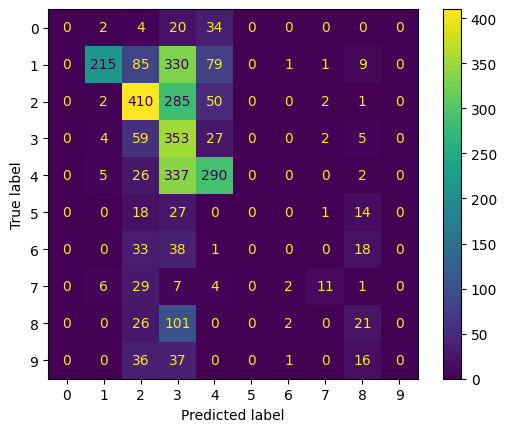

TP (True Positive): [  0 215 410 353 290   0   0  11  21   0]
TN (True Negative): [3030 2351 2024 1458 2235 3030 2994 3024 2874 3000]
FN (False Negative): [   0   19  316 1182  195    0    6    6   66    0]
FP (False Positive): [ 60 505 340  97 370  60  90  49 129  90]
Training set score: 0.5469
Test set score: 0.4207

Model Accuracy Score : 0.4207
Precision Score : 0.4207
Recall Score : 0.4207
Mean Absolute Error : 1.3016


Sensitivity (true positive rate), for each class: [0.         0.29861111 0.54666667 0.78444444 0.43939394 0.
 0.         0.18333333 0.14       0.        ]
Specificity (true negative rate), for each class: [1.         0.99198312 0.86495726 0.55227273 0.91975309 1.
 0.998      0.9980198  0.97755102 1.        ]

FP rate: [0.         0.00801688 0.13504274 0.44772727 0.08024691 0.
 0.002      0.0019802  0.02244898 0.        ]
FN rate: [1.         0.70138889 0.45333333 0.21555556 0.56060606 1.
 1.         0.81666667 0.86       1.        ]



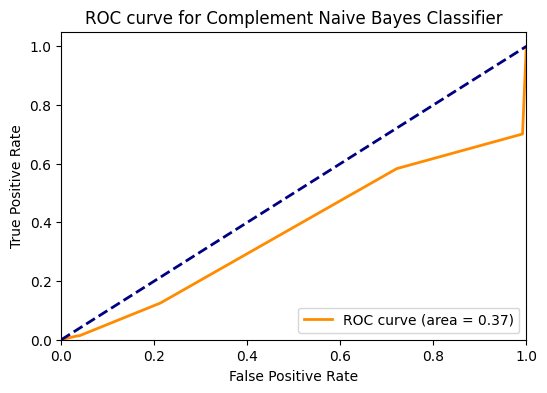

In [236]:
#training model with top 20 feature dataset
training_with_diff_datasets_CNB(df_20, train_y_df)

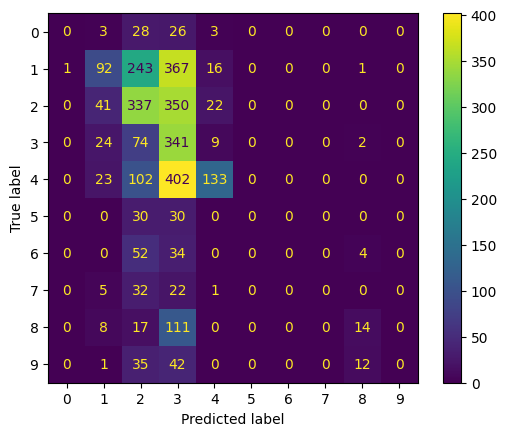

TP (True Positive): [  0  92 337 341 133   0   0   0  14   0]
TN (True Negative): [3029 2265 1727 1256 2379 3030 3000 3030 2921 3000]
FN (False Negative): [   1  105  613 1384   51    0    0    0   19    0]
FP (False Positive): [ 60 628 413 109 527  60  90  60 136  90]
Training set score: 0.3882
Test set score: 0.2968

Model Accuracy Score : 0.2968
Precision Score : 0.2968
Recall Score : 0.2968
Mean Absolute Error : 1.4278


Sensitivity (true positive rate), for each class: [0.         0.12777778 0.44933333 0.75777778 0.20151515 0.
 0.         0.         0.09333333 0.        ]
Specificity (true negative rate), for each class: [0.99966997 0.9556962  0.73803419 0.47575758 0.97901235 1.
 1.         1.         0.99353741 1.        ]

FP rate: [3.30033003e-04 4.43037975e-02 2.61965812e-01 5.24242424e-01
 2.09876543e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
 6.46258503e-03 0.00000000e+00]
FN rate: [1.         0.87222222 0.55066667 0.24222222 0.79848485 1.
 1.         1.         0.9066

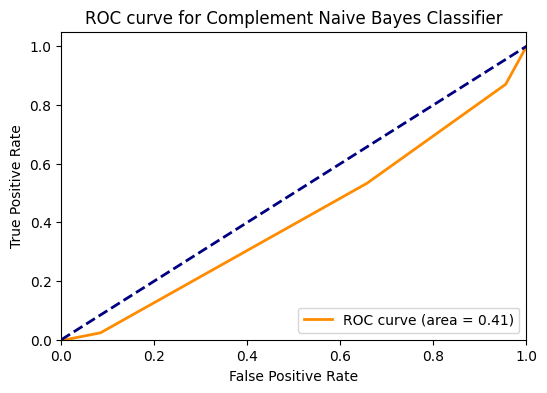

In [237]:
#training model with complete train dataset
training_with_diff_datasets_CNB(normalized_df, train_y_df)

## Inference
The best performing model out of Gaussian, Multinominal and Complement is Multinominal Naive Bayes giving an accuracy of 60.80% and 59.19% for train and test data respectively when trained on a dataset of top 5 features.

The reason why we did not implement Bernoulli Naive Bayes is because it expects each sample of the dataset to have a binary value. Since the values of the dataset are continuous values, the Bernoulli Naive Bayes models will not be appropriate to use here.

# END OF GAURI'S PART